# Export SIA data to CSV

## Set-up

In [2]:
# General imports
import numpy as np

# Data handling
import xarray as xr
import pandas as pd

basepath = "/Users/quraus001/Documents/Uni/Thesis/"
datapath = basepath + "data/"

In [3]:
# sea-ice area (UHH-SIA)
file   = "SIA_observations_nh_v2025_fv0.01_nsidc_osisaf.nc" 
ds_sia = xr.open_dataset(datapath + file)
df_sia = ds_sia.sel(time=ds_sia['time'].dt.month == 9).to_dataframe() # select September data
df_sia.index = df_sia.index.year # convert datetime index to years
df_sia = df_sia.loc[1979:2024]   # limit to satellite era
df_sia = df_sia.drop(columns=['nsidc_cdr'])

<Axes: xlabel='time'>

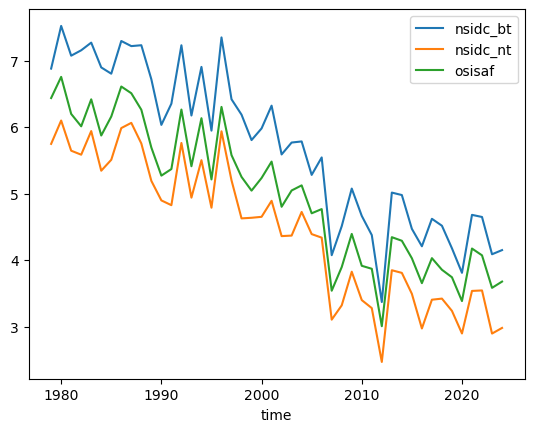

In [4]:
df_sia.plot()

In [6]:
df_sia.to_csv(datapath + "SIA_observations_nh_nsidc_osisaf.csv", index_label="year")

In [7]:
ds = xr.open_dataset("/Users/quraus001/Downloads/SeaIceArea__NorthernHemisphere__monthly__UHH__v2024_fv0.01.nc")
ds

<xarray.Dataset> Size: 134kB
Dimensions:        (time: 2088)
Coordinates:
  * time           (time) datetime64[ns] 17kB 1850-01-16 ... 2023-12-16
Data variables:
    HadISST_nsidc  (time) float64 17kB ...
    HadISST_orig   (time) float64 17kB ...
    esa            (time) float64 17kB ...
    nsidc_bt       (time) float64 17kB ...
    nsidc_nt       (time) float64 17kB ...
    osisaf         (time) float64 17kB ...
    walsh          (time) float64 17kB ...
Attributes: (12/28)
    Conventions:               CF-1.6
    title:                     Arctic sea-ice area derived from sea-ice conce...
    summary:                   This dataset contains the monthly mean Arctic ...
    institution:               Institut für Meereskunde, University of Hamburg
    topic_category:            Oceans ClimatologyMeteorologyAtmosphere
    keywords:                  Earth Science > Cryosphere > Sea Ice > Sea Ice...
    ...                        ...
    source:                    Satellite, Airborne reconnaissance, Shiplogs
    references:                Titchner, H. A., and N. A. Rayner (2014). The ...
    doi:                       https://doi.org/10.25592/uhhfdm.11346
    citation:                  Rauschenbach, Q., Dörr, J., Notz, D., and Kern...
    NCO:                       netCDF Operators version 4.9.2 (Homepage = htt...
    history:                   Mon Mar  4 14:50:39 2024: ncatted -O -a time_c...